In [21]:
%matplotlib notebook

import uproot
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import vector
import numpy as np
import awkward as ak
from ipywidgets import interact, FloatSlider


def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        n_events = int(len(inv_mass)/N_FRAMES*frame_number)
        data = inv_mass[:n_events]
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

In [19]:
@interact(nentries=(0, 10000))
def read_file(nentries):
    infile = uproot.open('../data/Run2012BC_DoubleMuParked_Muons.root')
    tree = infile['Events']

    branches = tree.arrays(entry_stop=nentries)

    # Require at least 2 muons
    two_muons_mask = branches['nMuon'] >= 2

    # Construct lorentz vectors
    muon_p4 = vector.zip({
        'pt': branches['Muon_pt'],
        'eta': branches['Muon_eta'],
        'phi': branches['Muon_phi'],
        'mass': branches['Muon_mass']
    })

    # For events with >= 2 muons, form an invariant mass
    selected_muon_p4 = muon_p4[two_muons_mask]
    muon0_p4 = selected_muon_p4[:, 0]
    muon1_p4 = selected_muon_p4[:, 1]
    inv_mass = (muon0_p4+muon1_p4).mass

interactive(children=(IntSlider(value=5000, description='nentries', max=10000), Output()), _dom_classes=('widg…

<IPython.core.display.Javascript object>


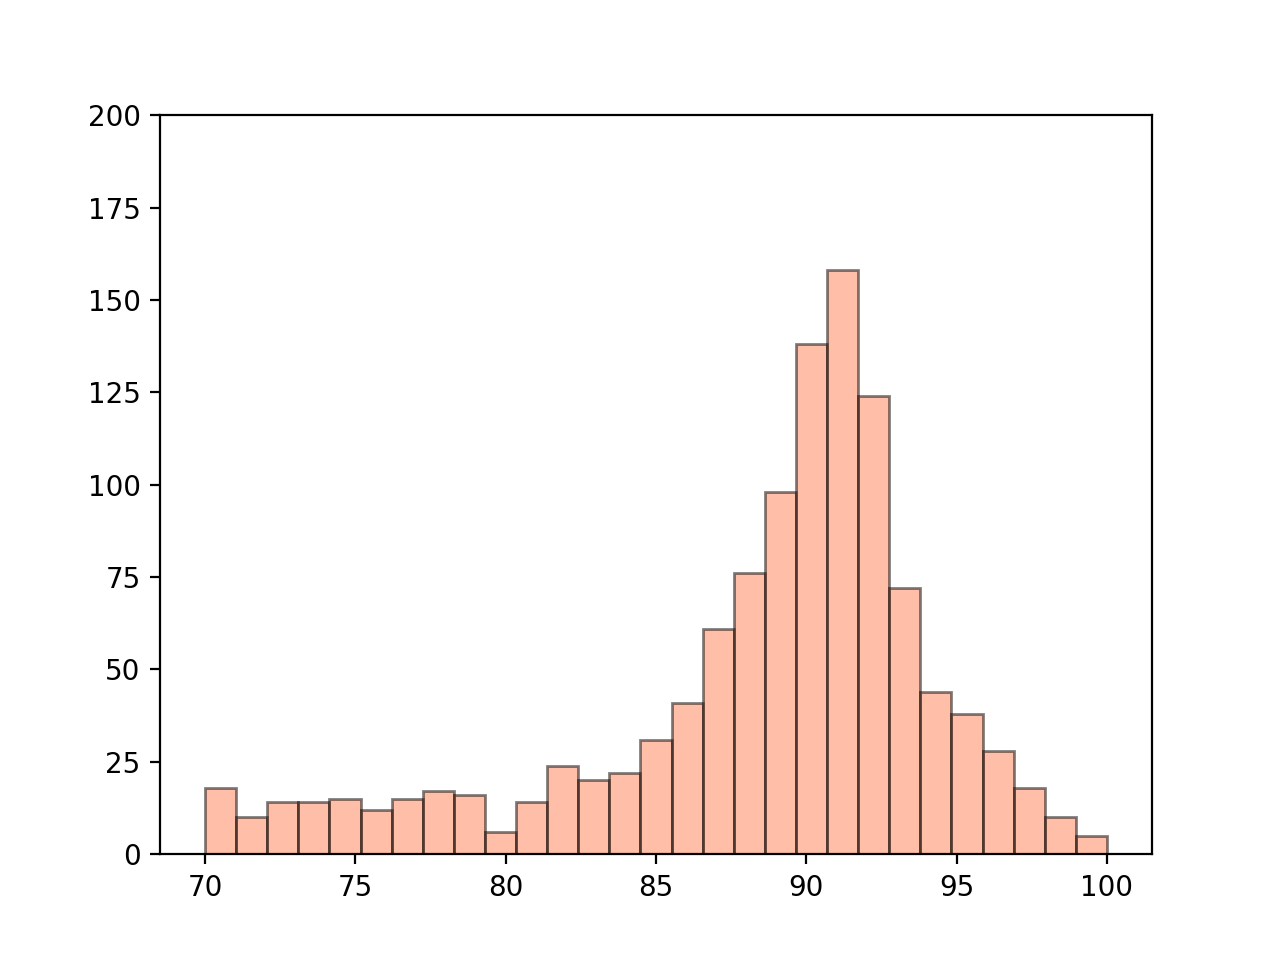

MovieWriter ffmpeg unavailable; using Pillow instead.


In [18]:
# Set stuff up
HIST_BINS = np.linspace(70,100,30)
N_FRAMES = 50
n, _ = np.histogram(inv_mass, HIST_BINS)

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(inv_mass[:0], HIST_BINS, lw=1,
                              ec="black", fc="coral", alpha=0.5)
ax.set_ylim(top=200)  # set safe limit to ensure that all data is visible.
ani = animation.FuncAnimation(fig, prepare_animation(bar_container), N_FRAMES,
                              repeat=False, blit=True)
plt.show()
ani.save('zpeak.gif')

<IPython.core.display.Javascript object>


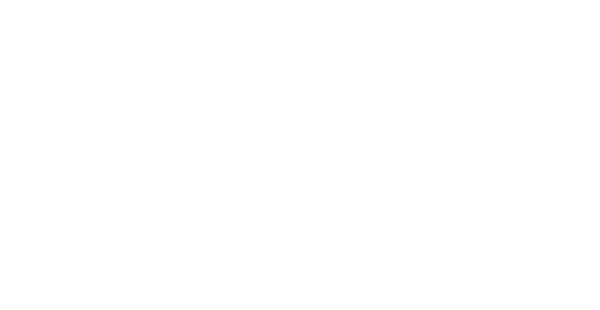

interactive(children=(FloatSlider(value=100.0, description='nevents', max=10000.0, step=10.0), Output()), _dom…

In [33]:
def interact_Z():
    
    nmin, nmax, nstep, ninit = 0.0, 10000.0, 10.0, 100.0
    
    infile = uproot.open('../data/Run2012BC_DoubleMuParked_Muons.root')
    tree = infile['Events']

    branches = tree.arrays(entry_stop=10000)

    # Require at least 2 muons
    two_muons_mask = branches['nMuon'] >= 2

    # Construct lorentz vectors
    muon_p4 = vector.zip({
        'pt': branches['Muon_pt'],
        'eta': branches['Muon_eta'],
        'phi': branches['Muon_phi'],
        'mass': branches['Muon_mass']
    })

    # For events with >= 2 muons, form an invariant mass
    selected_muon_p4 = muon_p4[two_muons_mask]
    muon0_p4 = selected_muon_p4[:, 0]
    muon1_p4 = selected_muon_p4[:, 1]
    inv_mass = (muon0_p4+muon1_p4).mass
    
    # Set up hist
    fig, ax = plt.subplots()
    HIST_BINS = np.linspace(70,100,30)
    ax.set_ylim(top=200)  # set safe limit to ensure that all data is visible.
    plt.close()

    def draw_Z(nevents):
        
        n, _ = np.histogram(inv_mass[:int(nevents)], HIST_BINS)
        #_, _, bar_container = ax.hist(inv_mass[:0], HIST_BINS, lw=1,
        #                      ec="black", fc="coral", alpha=0.5)
        display(fig)
        #plt.show()

    interact(draw_Z, nevents=FloatSlider(min=nmin, max=nmax, step=nstep, value=ninit))
interact_Z()